In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

In [34]:
# Read CSV into a DataFrame
file_path = 'winequality-red.csv'
wine_data = pd.read_csv(file_path)
wine_data.columns = [col.replace(" ", "_") for col in wine_data.columns]

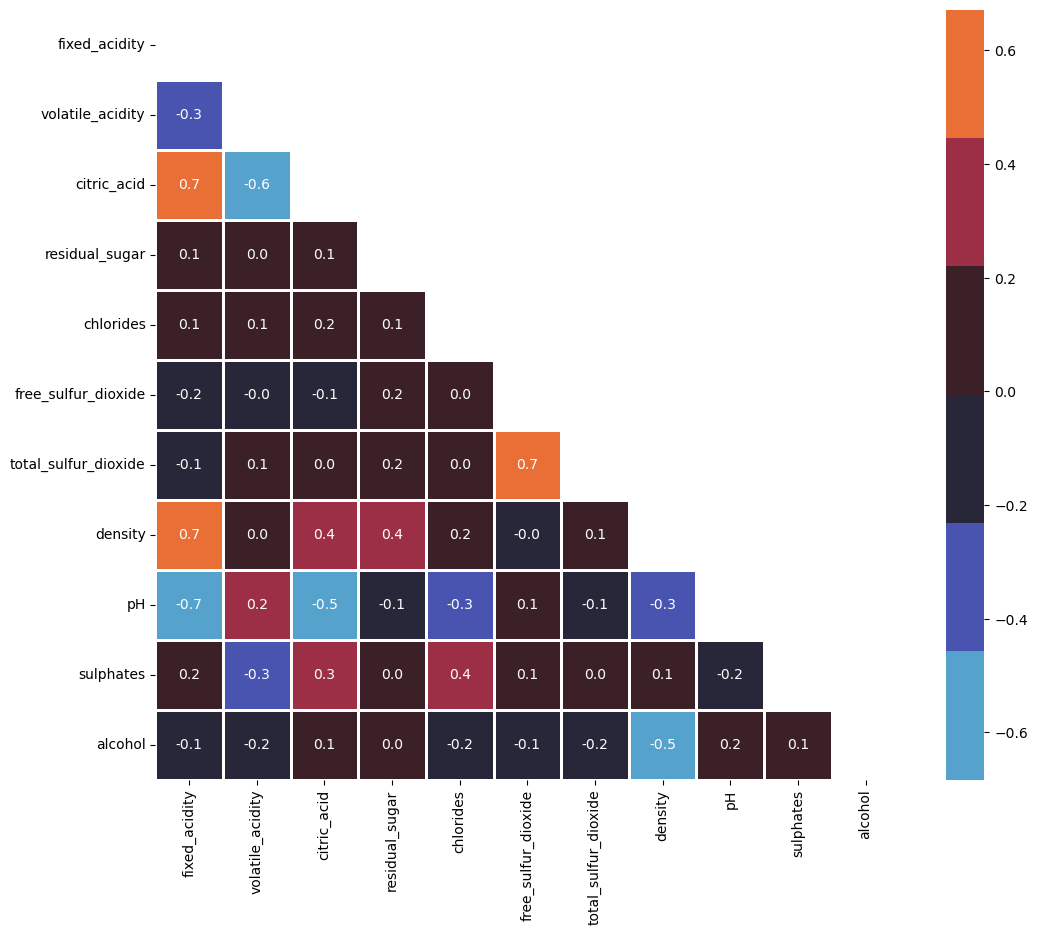

In [37]:
num_cols = ['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']
plt.figure(figsize=(12,10))
corr = wine_data[num_cols].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=1, mask=mask, cmap=sns.color_palette("icefire"));

In [4]:
# Assume 'quality' is the continuous target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [5]:
# Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [7]:
# Predictions
y_pred = linreg.predict(X_test)

In [8]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.39002514396395443


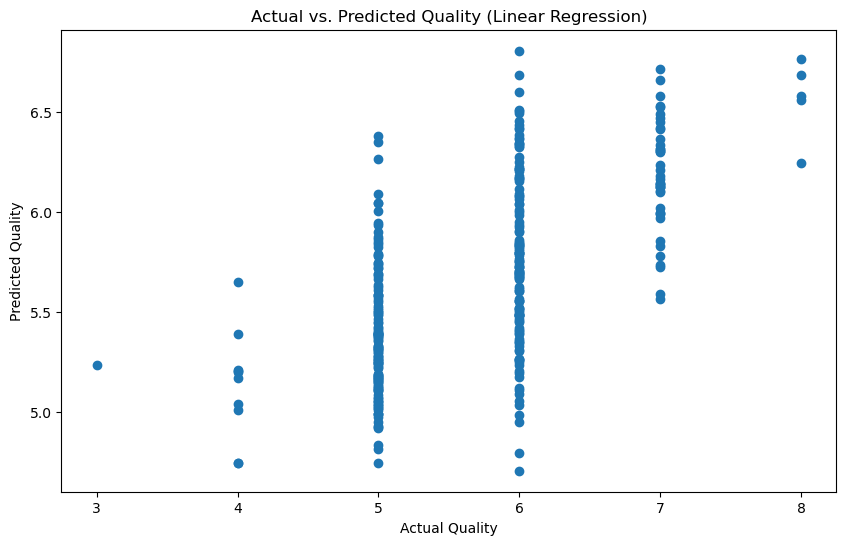

In [9]:
# Create a Scatter Plot for Predicted vs. Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs. Predicted Quality (Linear Regression)')
plt.show()

In [15]:
# Create a new binary target variable 'is_good' based on a threshold (e.g., quality >= 7 is considered good)
wine_data['is_good'] = (wine_data['quality'] >= 7).astype(int)

In [16]:
# Assume 'is_good' is the binary target variable
X = wine_data.drop(['quality', 'is_good'], axis=1)
y = wine_data['is_good']

In [17]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
# Predictions (convert predictions to binary using a threshold, e.g., 0.5)
y_pred = logreg.predict(X_test)

In [27]:
# Classification Report and Confusion Matrix
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.55      0.23      0.33        47

    accuracy                           0.86       320
   macro avg       0.72      0.60      0.62       320
weighted avg       0.83      0.86      0.83       320

Confusion Matrix:
[[264   9]
 [ 36  11]]


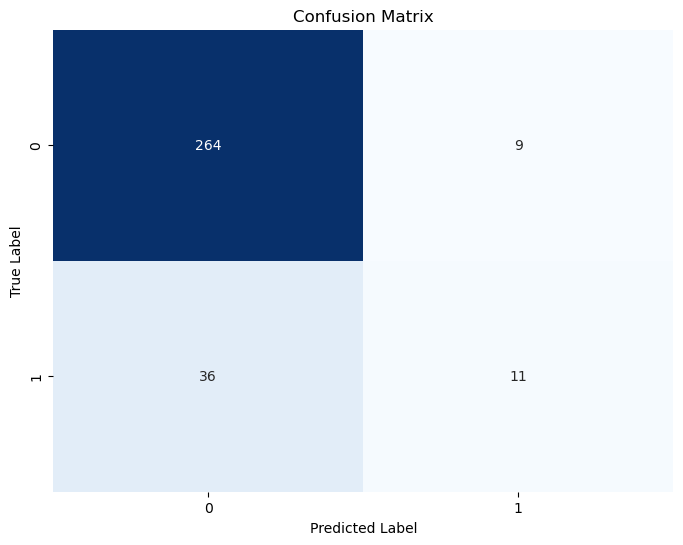

In [28]:
# Create a Heatmap for Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()